Esto es una simulación de tres días en los que un barco recorre una zona realizando un muestreo de Bloom a ciegas para evaluar la evolucíon de éste.
Parte de fichero de telemtría generados con Matlab

In [7]:
from os import getcwd
mybasedir=getcwd()+"\.."
from site import addsitedir   #Para poder realizar pruebas en el directorio.
addsitedir(mybasedir) #C:/Users/segu2/OneDrive - Universidad Complutense de Madrid (UCM)/devs-bloom-1

from xdevs.sim import Coordinator
from xdevs.models import Coupled
from edge.file  import FileIn,FileOut,FussionPosBloom 
from util.event import Event,DataEventId
import datetime as dt

class TestDay(Coupled):
  '''Un ejemplo acoplado que simula un día'''
  def __init__(self, name, start, day, log=False):
    super().__init__(name)
    filePi = FileIn("ShipPos", "../data/LatLon"+day+".xlsx", start=start, dataid=DataEventId.POS3D, log=log)     
    fileBi = FileIn("DetBlo", "../data/DetBloom"+day+".xlsx",start=start, dataid=DataEventId.BLOOM, log=log)     
    EdgFus= FussionPosBloom("EdgeFussion") #Fusiona Posición del barco con medida de Sensor de Bloom
    filePB = FileOut("filePB", "../data/FileOut"+day+".xlsx", log=log)     
    self.add_component(filePi)   
    self.add_component(fileBi)
    self.add_component(EdgFus)
    self.add_component(filePB)
    self.add_coupling(filePi.o_out, EdgFus.i_Pos)
    self.add_coupling(fileBi.o_out, EdgFus.i_Blo)
    self.add_coupling(EdgFus.o_out, filePB.i_in)

In [8]:
#Day 20210801
day="20210801"
startdt=dt.datetime(2021,8,1,0,0,0)
enddt=dt.datetime(2021,8,2,0,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = TestDay("Day"+day, start=startdt, day=day, log=False)
coord = Coordinator(coupled, flatten=True)
coord.initialize()
coord.simulate_time(simseconds)
coord.exit()

<AxesSubplot:title={'center':'Bloom Detection'}, xlabel='Lat'>

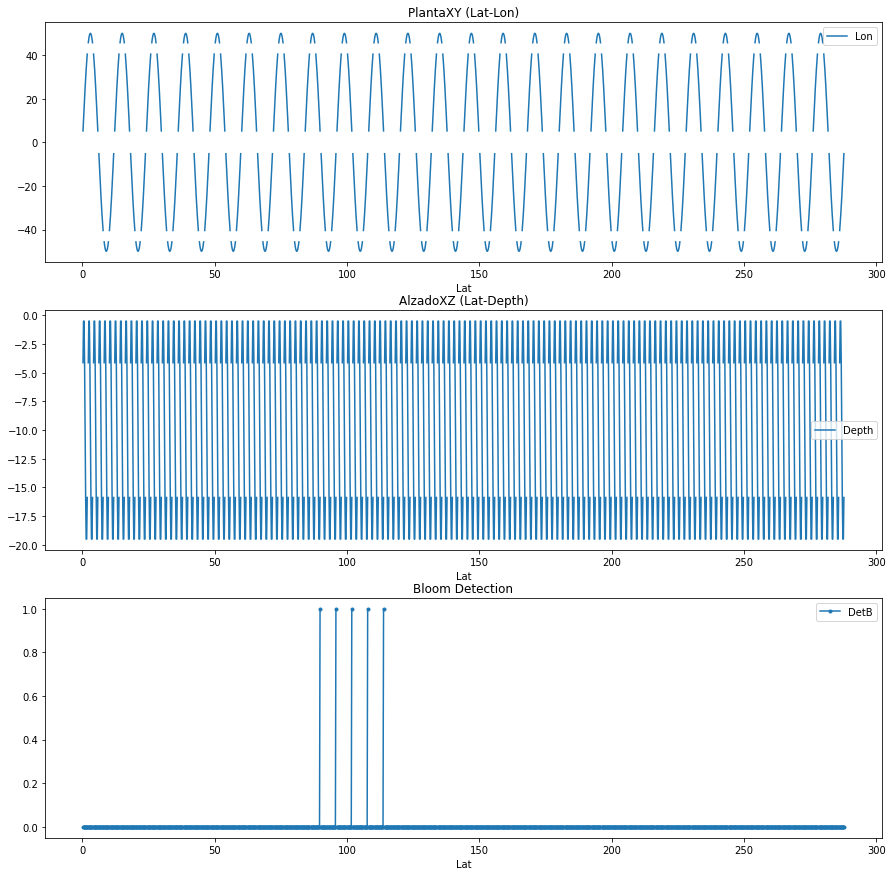

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.close("all")
fig, axes=plt.subplots(nrows=3,ncols=1)
P1=pd.read_excel("../data/FileOut"+day+".xlsx")  #Lectura de resultados excel
P1.plot(ax=axes[0],x='Lat',y='Lon',title='PlantaXY (Lat-Lon)')
P1.plot(ax=axes[1],x='Lat',y='Depth',title='AlzadoXZ (Lat-Depth)')
P1.plot(ax=axes[2],x='Lat',y='DetB',title='Bloom Detection',marker='.')

In [12]:
#Day 20210801
day="20210802"
startdt=dt.datetime(2021,8,2,0,0,0)
enddt=dt.datetime(2021,8,3,0,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = TestDay("Day"+day, start=startdt, day=day, log=False)
coord = Coordinator(coupled, flatten=True)
coord.initialize()
coord.simulate_time(simseconds)
coord.exit()


<AxesSubplot:title={'center':'Bloom Detection'}, xlabel='Lat'>

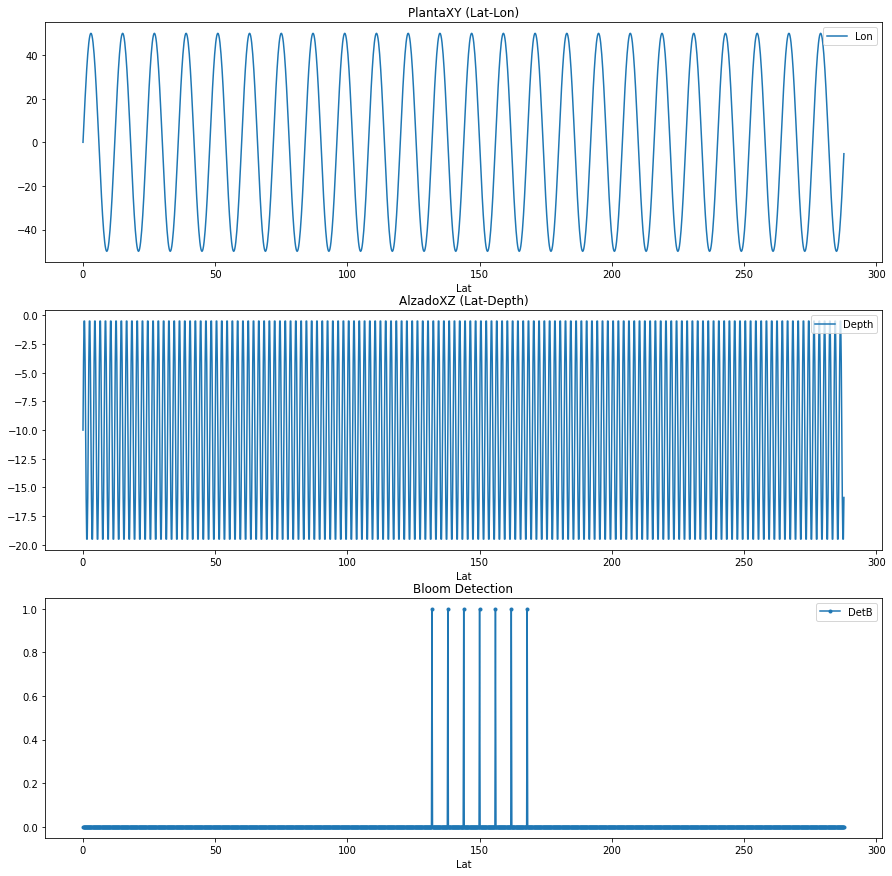

In [14]:
plt.close("all")
fig, axes=plt.subplots(nrows=3,ncols=1)
P2=pd.read_excel("../data/FileOut"+day+".xlsx")  #Lectura de resultados excel
P2.plot(ax=axes[0],x='Lat',y='Lon',title='PlantaXY (Lat-Lon)')
P2.plot(ax=axes[1],x='Lat',y='Depth',title='AlzadoXZ (Lat-Depth)')
P2.plot(ax=axes[2],x='Lat',y='DetB',title='Bloom Detection',marker='.')


In [15]:
#Day 20210801
day="20210803"
startdt=dt.datetime(2021,8,3,0,0,0)
enddt=dt.datetime(2021,8,4,0,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = TestDay("Day"+day, start=startdt, day=day, log=False)
coord = Coordinator(coupled, flatten=True)
coord.initialize()
coord.simulate_time(simseconds)
coord.exit()


<AxesSubplot:title={'center':'Bloom Detection'}, xlabel='Lat'>

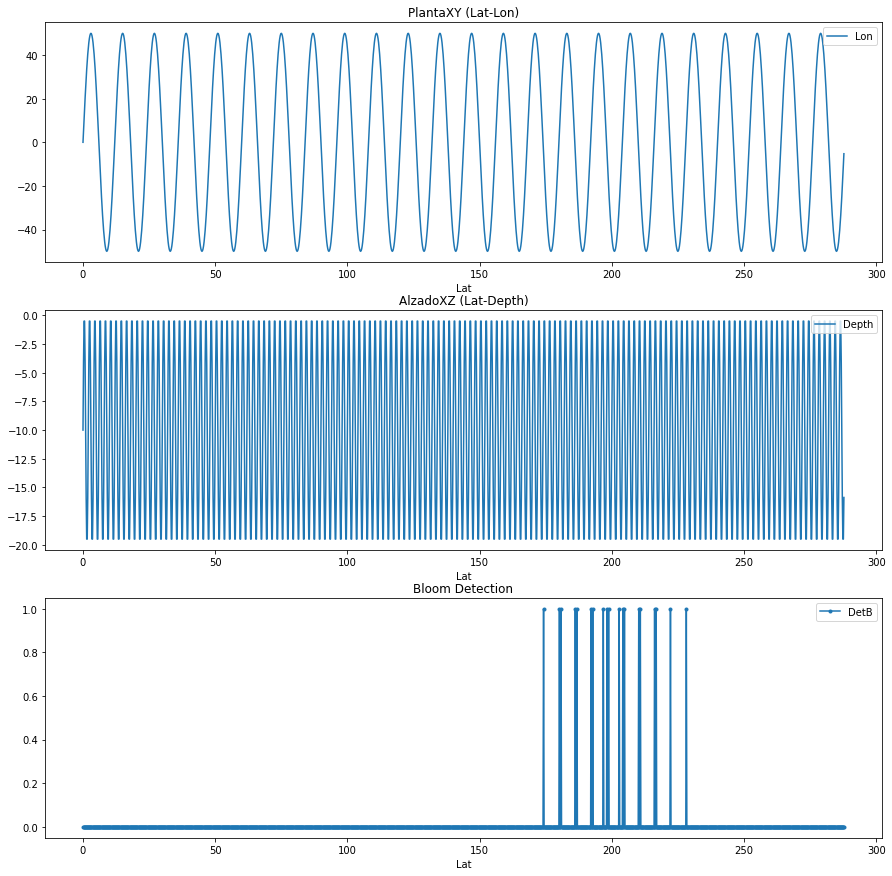

In [16]:
plt.close("all")
fig, axes=plt.subplots(nrows=3,ncols=1)
P3=pd.read_excel("../data/FileOut"+day+".xlsx")  #Lectura de resultados excel
P3.plot(ax=axes[0],x='Lat',y='Lon',title='PlantaXY (Lat-Lon)')
P3.plot(ax=axes[1],x='Lat',y='Depth',title='AlzadoXZ (Lat-Depth)')
P3.plot(ax=axes[2],x='Lat',y='DetB',title='Bloom Detection',marker='.')


Representación en 3D de los Blooms detectados en los 3 días.

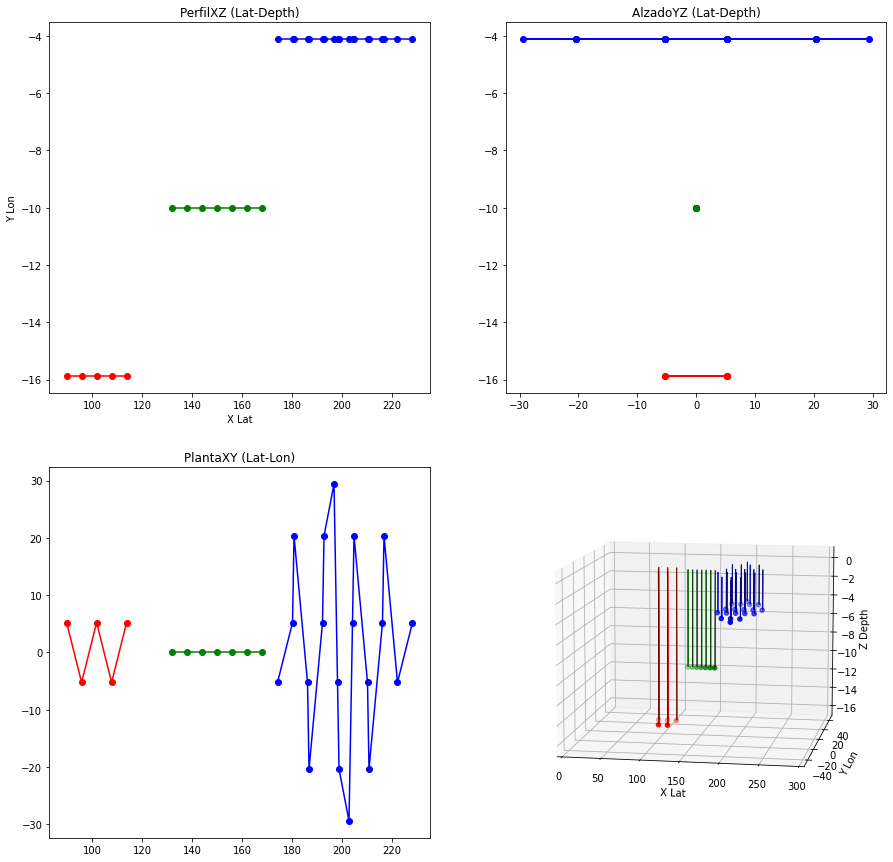

In [17]:

#import matplotlib.pyplot as plt
x1=P1[P1.DetBb==1].Lat
y1=P1[P1.DetBb==1].Lon
z1=P1[P1.DetBb==1].Depth
x2=P2[P2.DetBb==1].Lat
y2=P2[P2.DetBb==1].Lon
z2=P2[P2.DetBb==1].Depth
x3=P3[P3.DetBb==1].Lat
y3=P3[P3.DetBb==1].Lon
z3=P3[P3.DetBb==1].Depth

plt.close("all")

fig = plt.figure()
#ax1 = fig.gca(projection='3d')
plt.rcParams["figure.figsize"] = (10,10)

ax2=plt.subplot(221)
ax2.plot(x1,z1,color='r',marker='o')
ax2.plot(x2,z2,color='g',marker='o')
ax2.plot(x3,z3,color='b',marker='o')
ax2.set_title('PerfilXZ (Lat-Depth)')
ax2.set_xlabel('X Lat')
ax2.set_ylabel('Z Depth')
ax3=plt.subplot(222)
ax3.plot(y1,z1,color='r',marker='o')
ax3.plot(y2,z2,color='g',marker='o')
ax3.plot(y3,z3,color='b',marker='o')
ax3.set_title('AlzadoYZ (Lat-Depth)')
ax2.set_xlabel('Y Lon')
ax2.set_ylabel('Z Depth')
ax1=plt.subplot(223)
ax1.plot(x1,y1,color='r',marker='o')
ax1.plot(x2,y2,color='g',marker='o')
ax1.plot(x3,y3,color='b',marker='o')
ax1.set_title('PlantaXY (Lat-Lon)')
ax2.set_xlabel('X Lat')
ax2.set_ylabel('Y Lon')

#plt.rcParams["figure.figsize"] = (10,30)
ax4=plt.subplot(224,projection='3d')
ax4.scatter(x1, y1, z1, color='r')
ax4.bar3d(x1, y1, 0, 1, 1, z1, color='r')
ax4.scatter(x2, y2, z2, color='g')
ax4.bar3d(x2, y2, 0, 1, 1, z2, color='g')
ax4.scatter(x3, y3, z3, color='b')
ax4.bar3d(x3, y3, 0, 1, 1, z3, color='b')
#ax1.bar(x,y, zs=-50, zdir='z',data=z)
ax4.set_xlabel('X Lat')
ax4.set_ylabel('Y Lon')
ax4.set_zlabel('Z Depth')
plt.xlim([0,300])
plt.ylim([-50,50])
ax4.view_init(elev=10., azim=-80)




#plt.zlim([-20,0])
